In [ ]:
# !pip3.9 install psycopg2-binary --force-reinstall --no-cache-dir

In [86]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, inspect
import pandas as pd
from sqlalchemy.orm import sessionmaker

load_dotenv()

pd.set_option('plotting.backend', 'plotly')

In [56]:
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")
MART_SCHEMA = os.getenv("MART_SCHEMA")

table_name = "recent_rides"

In [57]:
def get_engine_connection():
    """
    Connects to postgreSQL DBMS on AWS Aurora
    """
    conn_string = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

    return create_engine(conn_string)

sql_engine = get_engine_connection()

In [59]:
recent_rides_data = pd.read_sql_table(table_name, con=sql_engine, schema=MART_SCHEMA)
recent_rides_data

,user_id,ride_id,gender,age,begin_timestamp,total_duration_sec,total_power,mean_power,mean_resistance,mean_rpm,mean_heart_rate
0,4712,326,Female,39,2022-10-09 12:02:24,520,30744.786,59.124588,41.715385,48.467308,96.426923
1,4712,327,Female,39,2022-10-09 12:11:07,520,31344.308,60.277515,41.792308,48.944231,104.357692
2,4712,328,Female,39,2022-10-09 12:19:50,520,30837.680,59.303231,41.703846,48.340385,115.567308
3,4712,329,Female,39,2022-10-09 12:28:32,520,33598.375,64.612260,41.800000,46.590385,102.544231
4,4712,330,Female,39,2022-10-09 12:37:15,520,29865.103,57.432890,41.707692,50.200000,102.675000
...,...,...,...,...,...,...,...,...,...,...,...
162,4752,488,Male,56,2022-10-10 10:52:26,520,28026.251,53.896637,41.307692,49.386538,93.405769
163,4752,489,Male,56,2022-10-10 11:01:09,520,23043.511,44.314444,41.323077,44.003846,134.826923
164,4752,490,Male,56,2022-10-10 11:09:52,520,29225.691,56.203252,41.300000,49.773077,108.692308
165,4752,491,Male,56,2022-10-10 11:18:35,520,34190.982,65.751888,41.392308,53.228846,121.384615


Share of rides across genders (in terms of ride number)

<AxesSubplot:title={'center':'Number of Rides By Gender'}, ylabel='user_id'>

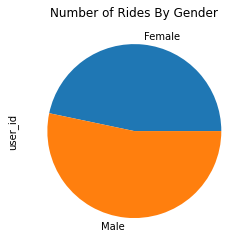

In [84]:
gender_count = recent_rides_data.groupby(["gender"]).count()["user_id"]

gender_count.plot(
    kind="pie",
    title="Number of Rides By Gender"
)

Share of rides across genders (in terms of total duration)

<AxesSubplot:title={'center':'Total Ride Duration By Gender'}, ylabel='total_duration_sec'>

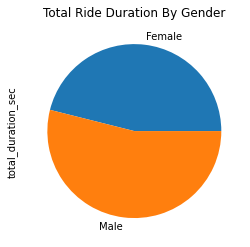

In [85]:
gender_duration = recent_rides_data.groupby(["gender"]).sum()["total_duration_sec"]

gender_duration.plot(
    kind="pie",
    title="Total Ride Duration By Gender"
)


Share of rides across age buckets

In [74]:
recent_rides_data["age"].value_counts(bins=[18,30,40,50,60,70,80,90]).sort_index()

(17.999, 30.0]    18
(30.0, 40.0]      20
(40.0, 50.0]      21
(50.0, 60.0]      36
(60.0, 70.0]      39
(70.0, 80.0]      33
(80.0, 90.0]       0
Name: age, dtype: int64

Cumulative total power output over last 12 hours

In [79]:
recent_rides_data["total_power"].sum()

4079497.642000006

Cumulative average power output over last 12 hours

In [81]:
recent_rides_data["mean_power"].mean()

48.66292060156703